# What is a Shell Script?  


* A shell script is a computer program designed to run in a shell (a command-line interpreter)  
* Scripts can be written in different scripting languages: sh, bash, csh, tcsh... Python is also a scripting language!  
* Typical functions are file manipulation, program executing and printing text  
* Shell scripts are used in automating tasks, system administration and even [data science](https://datascienceatthecommandline.com/)   
  * Scripting is often used to "glue" different components in a larger system or to wrap executables to provide command line options   
* They are typically created using simple text editors, rather than full-fledge IDEs, e.g., **nano**, **vim**  
  * TOP TIP: Learn the basics of vim before you finish this course. It is sometimes the only available editor on remote/cloud systems!  



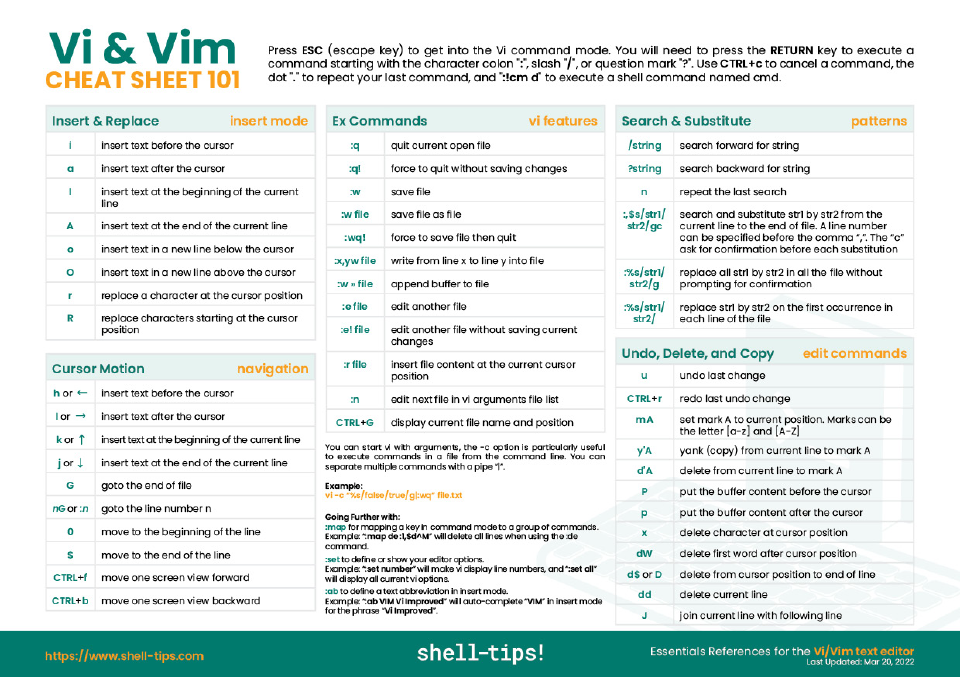  

[Interactive VIM tutorial](https://www.openvim.com/)  

# Bash Shell Scripts  

* Every script must start with a Shebang: the indicator of the shell used to run the script code
In bash, this is:

#!/bin/bash  
**#!/usr/bin/env bash**   -> This is preferable!

Examples for other scripting languages:  

#!/bin/sh  
#!/usr/bin/env python3  
#!/usr/bin/pwsh  -> PowerShell, mostly used in Windows systems  

* Script names are arbitrary, however it is customary to use the .sh extension  
> daily_automation.sh  

* Bash will search for the script only in PATH directories or else run it with a full path or leading "./" (which represents current local directory)  
> ./daily_automation.sh  
> /path/to/daily_automation.sh  
> /usr/bin/daily_automation.sh -> typical location for scripts available to all users  
> ~/daily_automation.sh -> a script in your $HOME directory  



### Run 1_hello-world script  

* Explain script output  



# Understanding Exit Codes  

* After execution, a command generates an exit code
* The last exit code generated can be requested using echo \\$?
* If 0, the command was executed successfully
* If 1, there was a generic error
* The developer of a program can decide to code other exit codes as well
* In shell scripts, this is done by using exit n in case an error condition occurs

# Using Variables  

* Using variables allows an operating system to keep program code generic, and separated from site-specific information  
* Use **env** to print a list variables available on your Shell session  
* To define a variable, use:  
> key=value  
* Print a variable's value using:  
> echo \\$key  
> echo \\${key}  
* Try this:  
> echo \\$keyHi  
> echo \\${key}Hi  
* Variables do not persist across Shell sessions. They must be defined on start-up scripts, such as:  
> ~/.bashrc  
> /etc/profile  

* PATH is a very important environment variable:  
> echo \\$PATH  
  * It specifies the directories to be searched to find a given command  
  
* There are no data types in Bash. Variables can contain number, character or strings of characters  



## Reading inputs  

* Command **read** stops script execution and reads user input:  

try this:  

```
echo enter a value
read value
echo you have entered $value
```  

* If read is used without further argument, the user input will be ignored  

```
echo press enter to continue
read
echo continuing...
```  

EXERCISE: Create 2 scripts with the code above and run them. Do not forget the shebang line.  

# Run 2_readit script

## Variables and SubShells  

* A Bash subshell, or a child shell, is a Bash Shell restarted from within itself  

```
echo $$
bash
echo $$
ps -ef | grep -v grep | grep your_process_id
```  

* echo \\$\\$ provide the PID (Process ID) for the current shell  
* bash launches a new subshell  
* **ps** command is used to list running processes, and **grep** to filter out text from text streams  
* In the example, PID 7371 is the parent process of PID 17523  

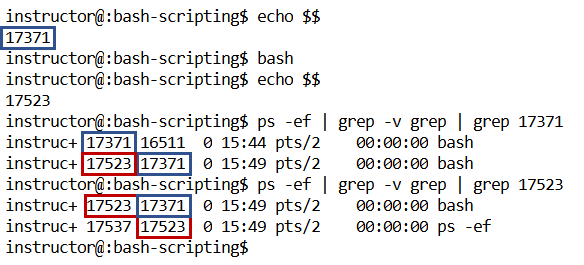  

* Variables can be passed on from a parent shell to child ones using **export**  

```
echo $$
myvar1="this is local"
export myvar2="this is global!"
bash
echo $$
echo $myvar1
echo "------"
echo $myvar2
```  

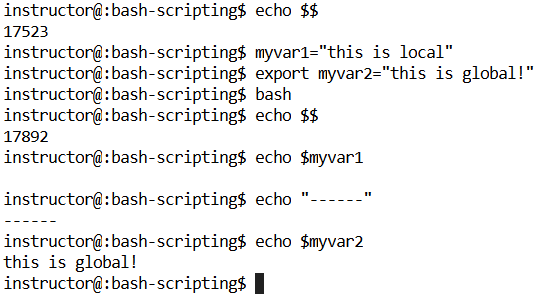  

* Notice myvar1 is empty on the subshell (PID 17892)  

* A typical pattern is to include all global variables into a shell script which is then *sourced* from the parent shell:  

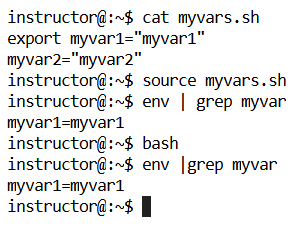  

### Passing Arguments to Scripts  

* Arguments (or Positional Parameters) are passed to scripts from the command line and stored on numerical variable names:  

  * \\$1, \\$2, \\$3, .... , \\${20}, etc  
  
  * \\$@ and \\$* (array notation in Bash) are used to address all arguments  

* With quotes, \\$@ expands to properly quoted arguments, and \\$* makes all arguments into a single argument  

# Run 3_passing_arguments  

# Run 4_array_notation  

Notice the use of for loops in this example  

## Command substitution  

* Command substitution in Bash allows us to execute a command and substitute it with its standard output  
* Note this command executes within a subshell, which means it has its own environment and so it will not affect the parent shell's environment  

```
today=$(date +%d-%m-%y)
echo $today

today=$(date +"%Y%m%dT%H%M%S") # in ISO8601 format
echo $today
```  




Typical Wrapper Shell Script  

```
#!/usr/bin/env bash

source my_global_vars.sh

now=$(date +"%Y%m%dT%H%M%S")
base_dir=/opt/service/
log_dir=${base_dir}/log
log_name=${now}.log
log_file=${log_dir}/${log_name}

mkdir -p ${log_dir}
cd ${base_dir}
python service.py > ${log_file}
```  

## Bash Calculations  

* \\$(( expression )) is used to evaluation mathematical expressions  
* **let** also be used  

```
a=$((1+2))
echo $a
let a++
echo $a
```   

# Run 5_countdown  

./5_countdown 1  

Notice the use of "while"  

# Run 6_countdown  

## if ... then ...  

```
if true
then
  echo command executed successfully
fi
```  

or as a one-liner:  
```
if true; then echo command executed successfully; fi
```  

* test [conditions](https://www.gnu.org/software/bash/manual/html_node/Bash-Conditional-Expressions.html) are written: \[ condition \] [examples](https://acloudguru.com/blog/engineering/conditions-in-bash-scripting-if-statements)    

```
myfile='/etc/hosts'
if [ -f $myfile ]; then echo file exists; fi
myfile='/etc/badhosts'
if [ ! -f $myfile ]; then echo file does not exist; fi
```  

* -z returns True if the variable is an empty string or an uninitialized variable  

```
if [ -z "$notavar" ]; then echo var exists; else echo var does not exists; fi
```


```
if [ 1 -le 2 ]; then echo True;else echo False; fi
if [ 1 -ge 2 ]; then echo True;else echo False; fi
```  
* -a and -o are used for AND and OR conditions, respectively:  

```
if [ 5 -ge 3 -a 5 -lt 10 ]; then echo True; else echo False; fi
```

* Alternative, && and || are supported:  

```
if [ 5 -ge 3 ] && [ 5 -lt 10 ]; then echo True; else echo False; fi
```

* Arithmetic conditions can also use double-parenthesis syntax which is more natural:  

Put the code below inside a file and run it from the Terminal:  
``` 
#!/usr/bin/env bash
echo Enter a number
read input
echo $input
condition=5
if (( $input <= $condition )); then echo $input is less than or equal $condition; else echo $input is greater than $condition; fi
```

* String comparison operations  

```
myvar=thisvalue
if [ "$myvar" == "thisvalue" ]; then echo yes; else echo incorrect; fi
```  

* Nesting multiple if conditions:  

```
#!/usr/bin/env bash
if [ -d $1 ]; then
  echo $1 is a directory
elif [ -f $1 ]; then
  echo $1 is a file
else
  echo $1 is an unknown entity
fi
```  

# Run 7_numcheck   

## Conditionals and Loops  

* if ... then ... else is used to execute commands if a specific condition is true  
```if [ -z $1 ]; then echo hello; fi```  
* for is used to execute a command on a range of items  
```for i in "$@"; do echo $i; done```    
* while is used to run a command as long as a condition is true  
```while true; do true; done```  
* until is used to run a command as long as a condition is not true  
```counter=0; until [ $counter -gt 7 ];do echo Counter: $counter; ((counter++)); done```  
* case is used to run a command if a specific situation is true  

```
#!/usr/bin/env bash
read EXPRESSION
case EXPRESSION in

  PATTERN_1)
    STATEMENTS
    ;;

  PATTERN_2)
    STATEMENTS
    ;;

  PATTERN_N)
    STATEMENTS
    ;;

  *)
    STATEMENTS
    ;;
esac

```  

## Run 8_country  

* [tr command reference](https://www.geeksforgeeks.org/tr-command-in-unix-linux-with-examples/)  

## Bash Functions   


* Notice your first [Bash Function](https://ryanstutorials.net/bash-scripting-tutorial/bash-functions.php): minusone    

```
#!/bin/bash

COUNTER=$1
COUNTER=$(( COUNTER * 60 ))

minusone(){
        COUNTER=$(( COUNTER - 1 ))
        sleep 1
}

while [ $COUNTER -gt 0 ]
do
        echo you still have $COUNTER seconds left
        minusone
done

[ $COUNTER = 0 ] && echo time is up && minusone
[ $COUNTER = "-1" ] && echo you now are one second late && minusone

while true
do
        echo you now are ${COUNTER#-} seconds late # ${COUNTER#-} turns a negative number into positive  
        minusone
done
```  

## Run 9_minusone

## Break and Continue  

* **break** is used to leave a loop straight away, typically to handle exceptional cases    
* **continue** is used to stop running through this iteration and begin the next iteration  

Review, understand and run 2 advanced scripts:  


## 10_backout: backup script that stops if insufficient disk space is available   
## 11_convert: convert file names to lower case if required  


# Additional Practice


* ```wc``` reports that the file animals.txt has 7 lines, 51 words, and 325 characters.
```
instructor@:Bash_Labs$ wc animals.txt
  7  51 325 Eanimals.txt
```  

```  
$ wc -l animals.txt
7 animals.txt
$ wc -w animals.txt
51 animals.txt
$ wc -c animals.txt
325 animals.txt
```  

* ```head``` is handy for peeking at the top of a file or from standard input  
```  
instructor@:command_2_head$ head -n3 animals.txt
python  Programming Python      2010    Lutz, Mark
snail   SSH, The Secure Shell   2005    Barrett, Daniel
alpaca  Intermediate Perl       2012    Schwartz, Randal
```  

```  
instructor@:command_2_head$ ls /bin | head -n5
bash
bunzip2
bzcat
bzcmp
bzdiff
```  

* The ```cut``` command prints one or more columns from a file  

  * multiple fileds
```
instructor@:command_2_head$ cut -f1,3 animals.txt | head -n3
python  2010
snail   2005
alpaca  2012
```  
  * by range  
```
instructor@:command_2_head$ cut -f1-3 animals.txt | head -n3
python  Programming Python      2010
snail   SSH, The Secure Shell   2005
alpaca  Intermediate Perl       2012
```  
  *  by character position (-c)  

```
instructor@:command_2_head$ cut -c1-3 animals.txt
pyt
sna
alp
rob
hor
don
ory
```  
  * combined with pipes  
  
```
instructor@:command_2_head$ cut -f4 animals.txt | cut -d, -f1
Lutz
Barrett
Schwartz
Bell
Siever
Boney
Roman
```  